In [2]:
## 30 tests 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.io
import h5py
import pandas as pd

mat = scipy.io.loadmat('data.mat')

print(mat['X'][:,0])
newData = list(zip(mat['X'][:,0], mat['X'][:,1], mat['X'][:,2]))
columns = ['MPa', 'Strain', 'GPa']
df = pd.DataFrame(newData, columns=columns)
print(newData)
df


[68. 52. 70. 55. 53. 63. 68. 53. 72. 57. 57. 64. 67. 65. 57. 58. 59. 64.
 58. 60. 49. 52. 65. 49. 70. 51. 54. 66. 61. 58.]
[(68.0, 1.3, 10.220412386240216), (52.0, 1.9, 5.148056885805811), (70.0, 0.9, 15.232400877970843), (55.0, 2.3, 4.676555909817842), (53.0, 2.1, 4.833515826049221), (63.0, 1.7999999999999998, 6.870628575913105), (68.0, 1.6, 8.30648534685593), (53.0, 2.2, 4.761607859133111), (72.0, 1.2, 11.638504403664614), (57.0, 2.35, 4.707144470013238), (57.0, 1.7999999999999998, 6.169892359255693), (64.0, 1.9, 6.66198283894528), (67.0, 1.5, 8.54410917553385), (65.0, 1.3, 9.774078219027603), (57.0, 1.5999999999999999, 6.480272309815577), (58.0, 1.2999999999999998, 8.53919955850591), (59.0, 1.5, 7.140274681545449), (64.0, 1.5, 8.387662466433827), (58.0, 2.0, 5.231745940553471), (60.0, 1.9, 6.038608438025619), (49.0, 2.2, 4.312544210960289), (52.0, 2.4, 4.113261409980183), (65.0, 1.2, 10.622338686302365), (49.0, 2.7, 3.371484642657404), (70.0, 1.5, 8.893804874716915), (51.0, 2.5, 3.9

,MPa,Strain,GPa
0,68.0,1.30,10.220412
1,52.0,1.90,5.148057
2,70.0,0.90,15.232401
3,55.0,2.30,4.676556
4,53.0,2.10,4.833516
5,63.0,1.80,6.870629
6,68.0,1.60,8.306485
7,53.0,2.20,4.761608
8,72.0,1.20,11.638504
9,57.0,2.35,4.707144


0     68.0
1     52.0
2     70.0
3     55.0
4     53.0
5     63.0
6     68.0
7     53.0
8     72.0
9     57.0
10    57.0
11    64.0
12    67.0
13    65.0
14    57.0
15    58.0
16    59.0
17    64.0
18    58.0
19    60.0
20    49.0
21    52.0
22    65.0
23    49.0
24    70.0
25    51.0
26    54.0
27    66.0
28    61.0
29    58.0
Name: MPa, dtype: float64
(30,)
[0 1 2]
['r', 'g', 'b']
[False False False False False  True False False False False  True  True
 False False  True  True  True  True  True  True False False False False
 False False False False  True  True]


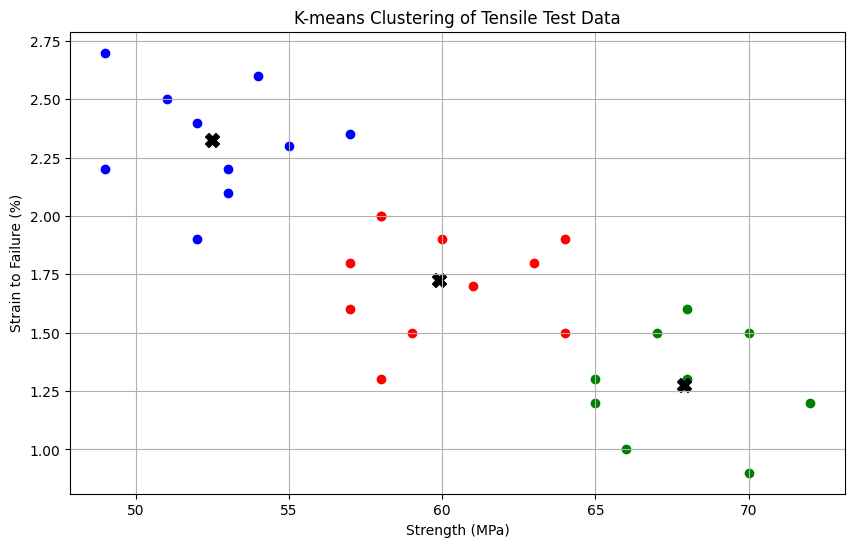

In [9]:
## Organize by humidity
# Normalize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Apply K-means clustering with K=3
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# To avoid local minima issues, you can run K-means multiple times with different initializations
# and select the best result based on the lowest inertia (within-cluster sum of squares)
best_inertia = float('inf')
best_kmeans = None

for _ in range(10):  # Run K-means 10 times with different initializations
    kmeans = KMeans(n_clusters=3, random_state=None)  # Random initialization
    kmeans.fit(X_scaled)
    if kmeans.inertia_ < best_inertia:
        best_inertia = kmeans.inertia_
        best_kmeans = kmeans

labels = best_kmeans.labels_


# Inverse transform to bring data back to the physical scale
X_clusters = scaler.inverse_transform(best_kmeans.cluster_centers_)

# Plot the results
colors = ['r', 'g', 'b']
print(df.iloc[:,0])
print(labels.shape)
print(np.unique(labels))
print(colors)
aux = labels == 0
print(aux)


plt.figure(figsize=(10, 6))


for i in range(3):
    aux = labels == i
    position_vector = np.where(aux)[0]

    for j in position_vector:
        plt.scatter(df.iloc[j, 0], df.iloc[j, 1], c=colors[i], label = j)

plt.scatter(X_clusters[:, 0], X_clusters[:, 1], c='k', marker='X', s=100, label='Cluster Centers')
plt.xlabel('Stress (MPa)')
plt.ylabel('Strain to Failure (%)')
plt.title('K-means Clustering of Tensile Test Data')
plt.grid(True)
plt.show()  

Exercise a 3D plot for the K means clustering

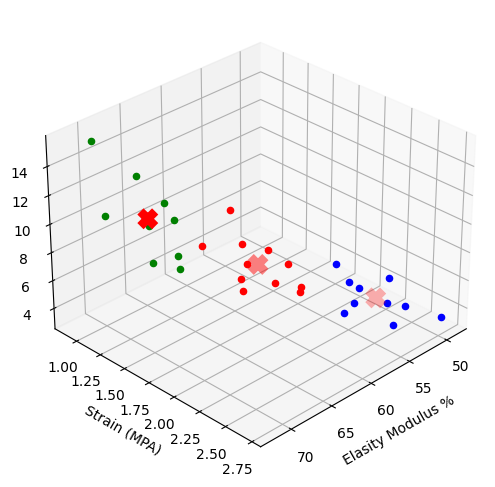

In [18]:
fig_3d = plt.figure(figsize=(8,6))
ax_3d = fig_3d.add_subplot(projection = "3d")
    
#for i in range(3):
#    ax_3d.scatter(df.iloc[i, 0], df.iloc[i, 1],df.iloc[i,2],lw = 5,label="class{}".format(i))

for i in range(3):
    aux = labels == i
    position_vector = np.where(aux)[0]

    for j in position_vector:
        ax_3d.scatter(df.iloc[j, 0], df.iloc[j, 1],df.iloc[j,2], c=colors[i], label = j)
    
ax_3d.scatter(X_clusters[:, 0], X_clusters[:, 1],X_clusters[:,2],c="r",marker="x",lw = 15,label="centroid")
ax_3d.set_xlabel("Elasity Modulus %")
ax_3d.set_ylabel("Strain (MPA)")
ax_3d.set_zlabel("Stress (MPA)")
ax_3d.view_init(30, 45)


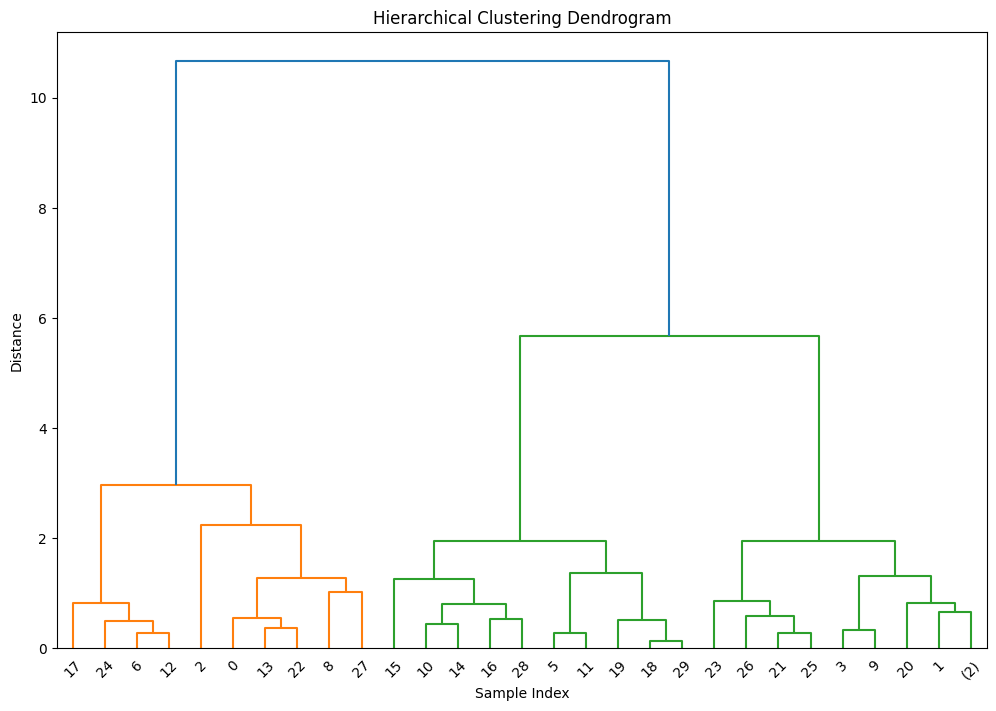

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler

# Assuming you have loaded your data into the 'X' array and normalized it
# If not, you can reuse the data and normalization steps from your K-means code

# Perform hierarchical clustering
linkage_matrix = linkage(X_scaled, method='ward')  # You can choose a different linkage method if needed

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, p=5, truncate_mode='level', leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


[False  True False  True  True False False  True False  True False False
 False False False False False False False False  True  True False  True
 False  True  True False False False]
Cluster Assignments:
[1 3 1 3 3 2 1 3 1 3 2 2 1 1 2 2 2 1 2 2 3 3 1 3 1 3 3 1 2 2]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


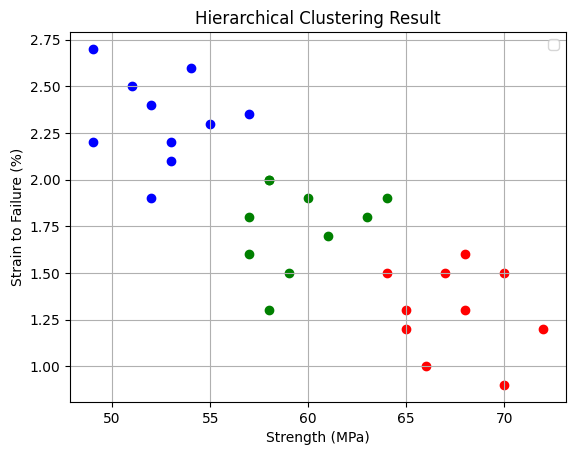

In [81]:
num_clusters = 3  # Number of clusters
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
print(clusters == 3)

# Display cluster assignments
print('Cluster Assignments:')
print(clusters)

# Plot the data points color-coded by cluster
colors = ['r', 'g', 'b']

for i in range(3):
    aux = clusters == i+1
    position_vector = np.where(aux)[0]

    for j in position_vector:
        plt.scatter(df.iloc[j, 0], df.iloc[j, 1], c=colors[i])

plt.xlabel('Strength (MPa)')
plt.ylabel('Strain to Failure (%)')
plt.legend()
plt.title('Hierarchical Clustering Result')
plt.grid(True)
plt.show()